
# Example 

Quantitative Analysis and Forecasting 


Dow Jones Industrial Average (^DJIA) 

In [8]:
#imports 

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pandas_datareader import data as pdr
import pandas_datareader.data as web

import warnings
warnings.filterwarnings('ignore')

TDow Jones is a stock market index that measures the stock performance of a selection of 30 large companies listed on US stock exchanges.


The Dow Stocks are weighted as shown below:
(% Weight of each Stock in the index)

In [5]:
weights = pd.read_csv('weight.csv')
weights.head(3)

,Stock,Weight
0,United Health Group,7.75
1,Goldman Sachs,6.77
2,Home Depot,6.29


In [6]:
weights.shape

(30, 2)

### Visual representation of the composition of Dow Jones index

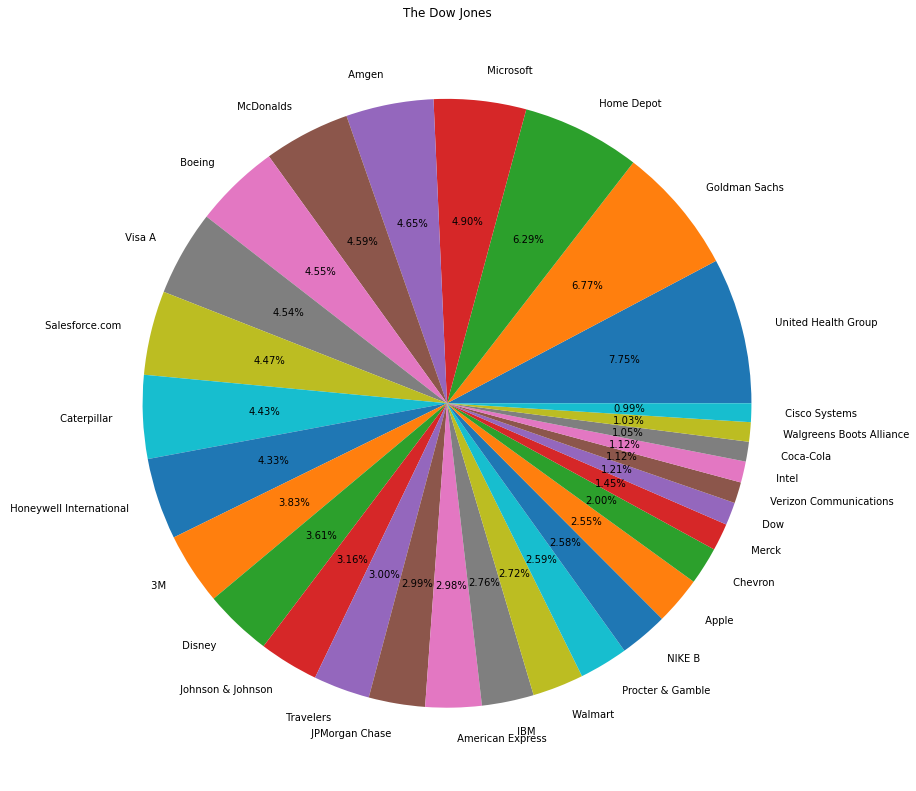

In [7]:
plt.figure(figsize = (14,14))

stock = weights['Stock']
weight = weights[' Weight']

plt.pie(weight, labels=stock, autopct = "%0.2f%%")
plt.title("The Dow Jones")
plt.show()

###  Analysis of Percentage Changes in each of the Dow Jones stocks on November 16, 2021:

#### 1. Getting price data from Yahoo Finance: 

In [4]:
# Tickers list for the 30 stocks contained in the Dow Jones index: 

tickers=["MMM","AXP","AMGN","AAPL","BA","CAT","CVX","CSCO","KO","DOW","GS","HD","HON","IBM","INTC","JNJ","JPM","MCD","MRK","MSFT","NKE","PG","CRM","TRV","UNH","VZ","V","WMT","WBA","DIS"]


def get_price(stock, start, end):
    return pdr.get_data_yahoo(stock, start, end)['Adj Close']

prices = pd.DataFrame({n: get_price(n, "2021-11-14", "2021-11-16") for n in tickers})


In [5]:
prices

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DOW,...,NKE,PG,CRM,TRV,UNH,VZ,V,WMT,WBA,DIS
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-15,183.309998,183.130005,207.399994,150,233.089996,207.710007,116.820000,57.27,56.619999,59.919998,...,168.850006,147.399994,305.489990,158.059998,450.799988,52.400002,212.300003,146.910004,49.220001,158.429993
2021-11-16,183.369995,180.919998,205.389999,151,225.800003,205.429993,117.279999,57.00,56.220001,58.860001,...,171.830002,147.190002,307.089996,158.990005,449.619995,52.060001,215.179993,143.169998,48.570000,158.830002


#### 2. Some Data Processing 

Transpose df, rename columns, create a calculated column "%change", drop columns,etc...

In [37]:
df['%change'] = (df['today'] - df['yest'])/ df['yest']
data = df.drop(columns=["yest", "today"])
data.index.name = "Stocks"
data.head(3)

,%change
Stocks,
MMM,0.032730
AXP,-1.206797
AMGN,-0.969139


#### This is a cross sectional data where observations made at the same point in time - the percentage changes in each of the Dow Jones stocks on November 16, 2021.

#### 4.Understanding this data

Sorting data in DESC

In [45]:
data['%change'] = data['%change'].apply(lambda x: round(x, 2))

In [47]:
data.sort_values(by=['%change'], ascending=False)

,%change
Stocks,
HD,5.73
NKE,1.76
V,1.36
MSFT,1.02
AAPL,0.67
TRV,0.59
INTC,0.58
CRM,0.52
MRK,0.50


#### 5. Financial Information inferred: 

#### Prices went up today for 12 of the stocks and down for 18 stocks, ranging from 5.72% increase for Home Depot, to a 3.13% decline for Boeing Co.

In [48]:
#Count positive % price changes

len(data[data['%change'] > 0])

12

#### Visualizing this information:


Bar charts are useful to show Dow Jones stocks percentage price changes on November 16, 2021:

#### Bar chart below shows %price changes on November 16, 2021 for each of the Dow Jones stocks:

Text(0, 0.5, '%price change')

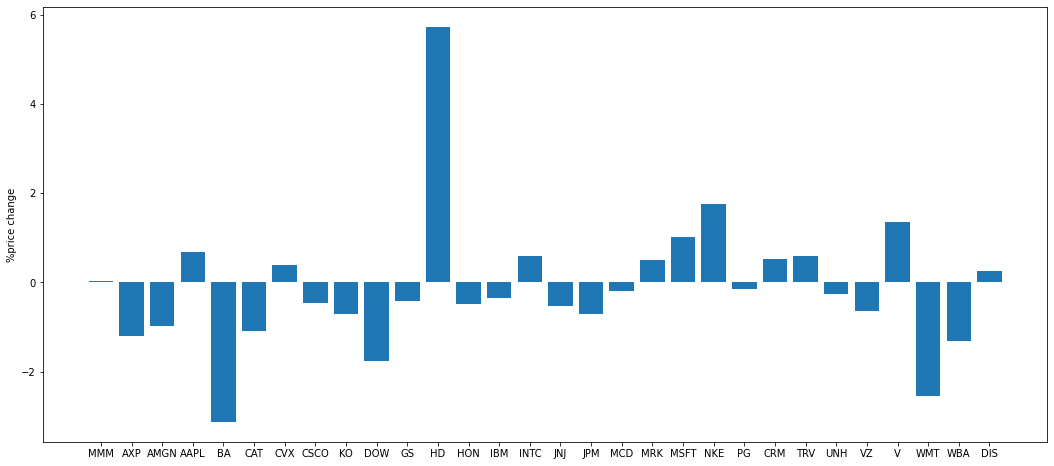

In [49]:
#plt.rcParams to change the fig size
plt.rcParams["figure.figsize"] = (18,8) 

plt.bar(x=np.arange(data.size), height=data['%change'], tick_label=data.index)
plt.ylabel("%price change")


#### Bar chart below shows this data sorted:

In [51]:
df1= data.sort_values(by=['%change'], ascending=False)

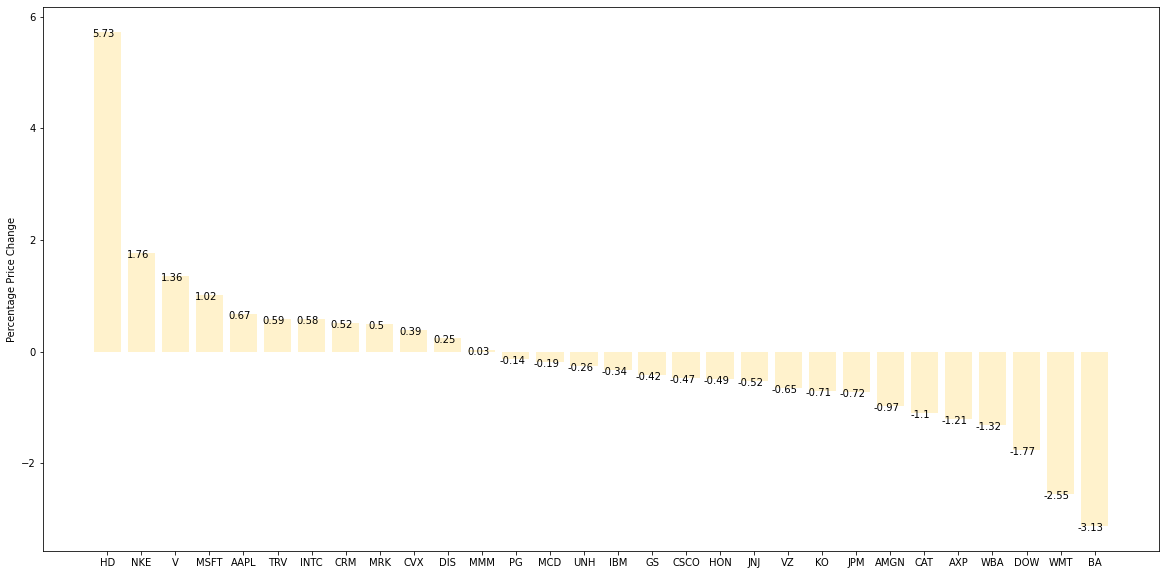

In [53]:
plt.rcParams["figure.figsize"] = (20,10)

stocks = df1.index
change = df1['%change']

x = np.arange(30) # the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots()
ax.set_ylabel('Percentage Price Change')
ax.set_xticks(x)
ax.set_xticklabels(stocks)

#adding percentage price change on the bars
b = ax.bar(x, change, label='% price change', color ='#fff2cc')
for p in b:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x(), height),
      xytext=(10, -7),
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

#### This bar chart is a graphical representation of the same information, but easier to visualize.

Next, because the percentage price changes range from –3.13% to 5.72%, we can 

represent them on a bar chart with 8 equally spaced intervals ranging from –4% to 6%, then 

count the number of percentage price changes between each interval as follows: 

In [54]:
data.values

array([[ 0.03],
       [-1.21],
       [-0.97],
       [ 0.67],
       [-3.13],
       [-1.1 ],
       [ 0.39],
       [-0.47],
       [-0.71],
       [-1.77],
       [-0.42],
       [ 5.73],
       [-0.49],
       [-0.34],
       [ 0.58],
       [-0.52],
       [-0.72],
       [-0.19],
       [ 0.5 ],
       [ 1.02],
       [ 1.76],
       [-0.14],
       [ 0.52],
       [ 0.59],
       [-0.26],
       [-0.65],
       [ 1.36],
       [-2.55],
       [-1.32],
       [ 0.25]])

In [56]:
#use cut() to partition data values into bins:
partition = pd.cut(data['%change'], bins=np.linspace(-4,6,11))

#use value_counts() to count the number of percentage price changes in each interval
partition.value_counts(sort=False)


(-4.0, -3.0]     1
(-3.0, -2.0]     1
(-2.0, -1.0]     4
(-1.0, 0.0]     12
(0.0, 1.0]       8
(1.0, 2.0]       3
(2.0, 3.0]       0
(3.0, 4.0]       0
(4.0, 5.0]       0
(5.0, 6.0]       1
Name: %change, dtype: int64

#### 9. Information Inferred: data shows that of 30 Dow Jones stocks, 12 had a percent price changes btw (-1, 0], 8 btw (0, 1] and 3 btw (1, 2], etc.                                                                        
                                                                   


#### Below is a bar chart showing the number of stocks in each of the intervals:                                                                 

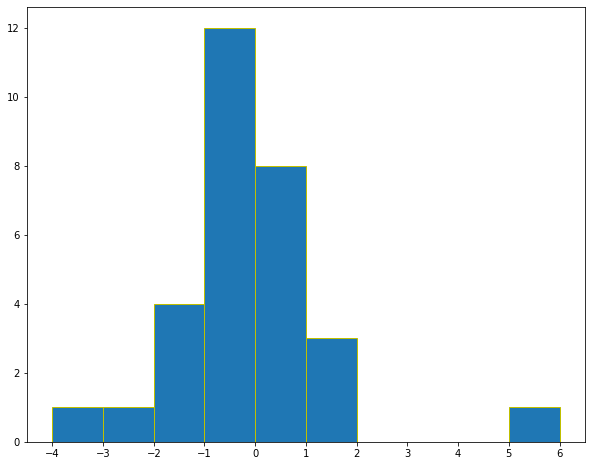

In [57]:
plt.rcParams["figure.figsize"] = (10,8) 

bins = np.linspace(-4,6,11)
b = plt.hist(data.values, bins=bins, edgecolor="y")
plt.xticks(bins)

plt.show()

#### 10. Remark 

At this point, I could go one step further to calculate the relative frequencies, then plot a histogram of the price change data with using equal/unequal intervals. But I leave this for another notebook. 

A histogram is intended to help understand the data. In this case, the histogram will allow me to graphically infer the information about the percent of the observations in each interval. 

#### 11. Overall percentage price change of the Dow Jones index:


As shown in the beginning of this notebook, stocks in the Dow Jones are weighted.

#### How is the Dow index is calculated?

- "The Dow index is calculated by adding the stock prices of the 30 companies and then dividing by the divisor. The divisor changes when there are stock splits or dividends, or when a company is added or removed from the index." (Investopedia)

- PCA algorithm can be used to understand the index composition - more https://github.com/kyramichel/Math_Finance/blob/master/PCA%20app.ipynb


In [58]:
dow= pdr.get_data_yahoo('^DJI', '2021-11-15')
dow['Adj Close']

Date
2021-11-15    36087.449219
2021-11-16    36142.218750
Name: Adj Close, dtype: float64

#### Information inferred: Today, November 16, 2021, the Dow  index went up + 0.15 % .

In [60]:
100*(36142.22 -36087.45)/36087.45

0.15177021374467878

#### 12. Let's look at the Dow Jones index over the years


Time Series graphs can be used to reveal characteristics of the data such as long-run trends and hanges/unusual deviations from the long-run trend.

In [82]:
s = datetime.datetime(1970, 1, 1)
e = datetime.datetime(2021, 11, 16)

In [83]:
dji = web.DataReader("^DJI", 'yahoo', s, e)

In [84]:
dji.tail(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-11-12,36147.628906,35934.589844,35963.781250,36100.308594,293180000,36100.308594
2021-11-15,36236.070312,36031.781250,36128.828125,36087.449219,280660000,36087.449219
2021-11-16,36316.609375,36076.179688,36076.179688,36142.218750,308290000,36142.218750


<AxesSubplot:xlabel='Date'>

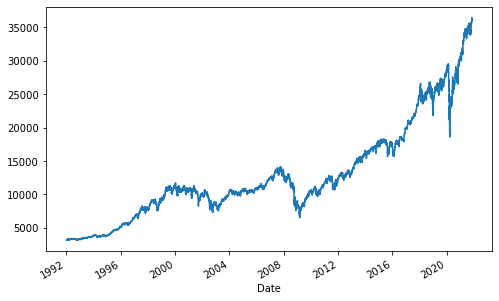

In [88]:
dji['Adj Close'].plot(figsize=(8,5), label='The Dow index')


#### Information inferred: The Time Series graph shows:
 
-an upward long-run trend 

-changes/unusual deviations from the long-run trend: 

- drop in price in 2008 and 2020
- other patterns in the data: an overall higher increase rate after 2009